In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

| Variable | Definition	| Key |
| :- | :- | :- |
| survival |	Survival	 | 0 = No, 1 = Yes |
| pclass	 |Ticket class	 | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex | 	
| Age |	Age in years | 	
| sibsp |	# of siblings / spouses aboard the Titanic	 | 
| parch |	# of parents / children aboard the Titanic	 | 
| ticket |	Ticket number	 | 
| fare |	Passenger fare	 | 
| cabin |	Cabin number	 | 
| embarked |	Port of Embarkation	 | C = Cherbourg, Q = Queenstown, S = Southampton |

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Trying to predict if they survived
## lets try to understand the data more closely

In [2]:
df = pd.read_csv('train.csv')
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## We can assume that PassengerID , Ticket Number, Cabin and Name shouldn't affect if they survive or not ,so we can drop them. 

In [3]:
df.drop(columns = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin'
], inplace=True )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Lot more males in our data, but the ratio of survived to not doesn't seem that different, we can keep this for now

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

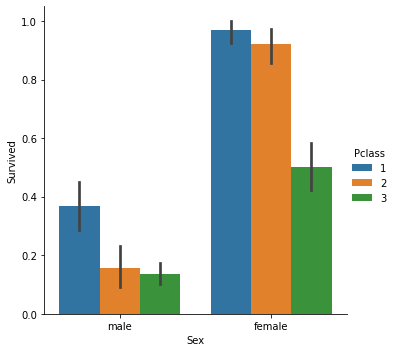

In [7]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)

df.groupby('Pclass')['Survived'].value_counts()

Having a higher class seems to have effect the ratio of how many survive.
## Lets do the same  for all the variables


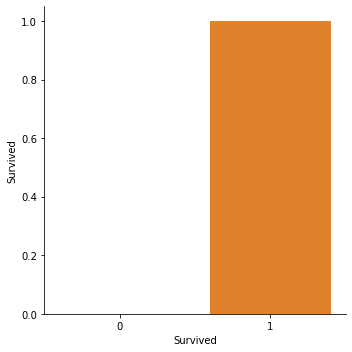

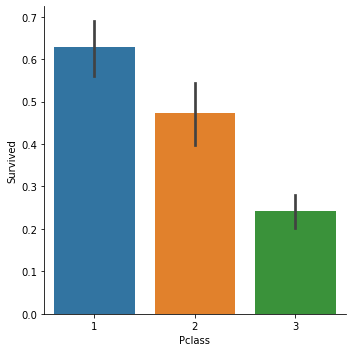

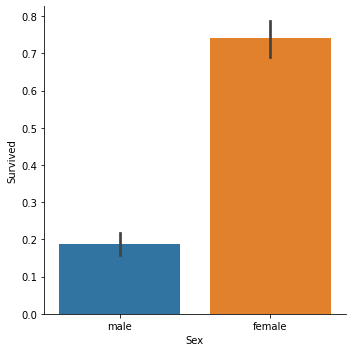

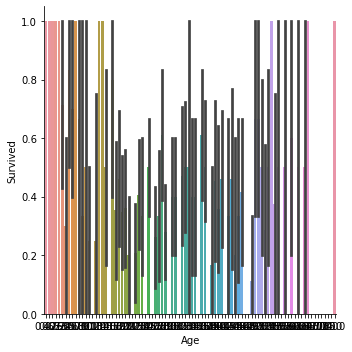

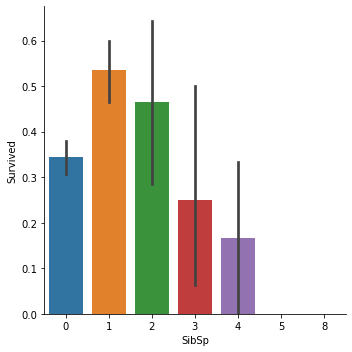

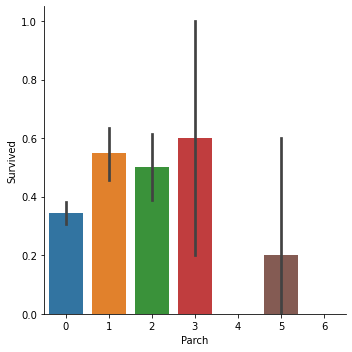

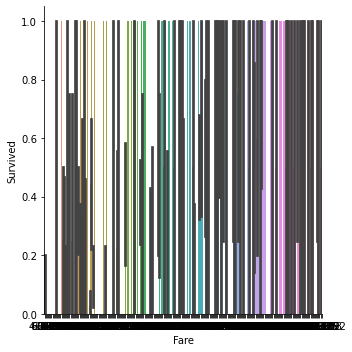

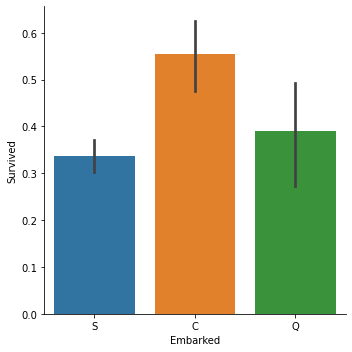

In [8]:
for i in df.columns:
    sns.catplot(x=i, y="Survived", kind="bar", data=df)


## Lets clean up the nan values before we explore more

In [9]:
missing_values_count = df.isnull().sum()
missing_values_count

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Looks like Age has some missing values and embarked has some too.\
For Age we can replace with mean and embarked we can backfill it 

In [10]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna(method='bfill',inplace=True)
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

split the data to get some mutual information before modelling

In [11]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [12]:
X = df.copy()
Y = X.pop('Survived')
scores = make_mi_scores(X,Y)
scores

Sex         0.150870
Fare        0.115435
Pclass      0.058107
SibSp       0.023197
Parch       0.016366
Embarked    0.014788
Age         0.013450
Name: MI Scores, dtype: float64

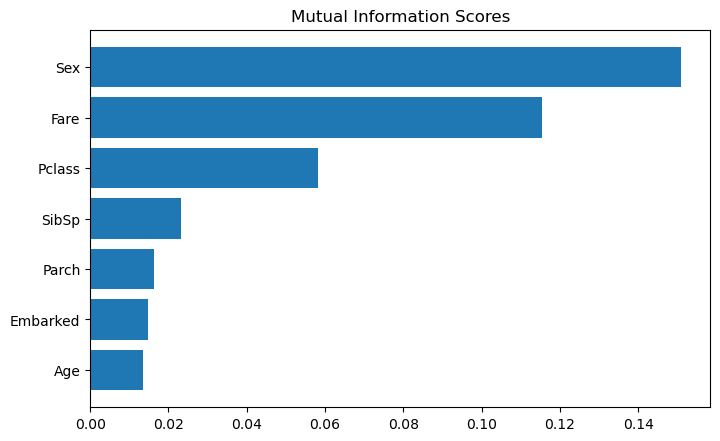

In [13]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(scores)



All the remaining data seems to have some significance to the result, so we can move forward

# Normalize/ one hot encoding variables then making  sure test data is the same way

In [14]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [15]:
for i in ['Pclass','SibSp','Parch','Embarked'] : 
    print(X[i].unique())

[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q']


We will one hot encode :Pclass and Embarked\
Normalize : SibSb,Age, Parch and Fare \
We will replace male and female with 1 and 0\

In [16]:
df = pd.get_dummies(df, columns = ['Pclass','Embarked'], drop_first=True)
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df[['Age','SibSp','Parch','Fare']] = ss.fit_transform(df[['Age','SibSp','Parch','Fare']])
df.Sex.replace({'male': 1, 'female': 0},inplace = True)    
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,1
1,1,0,0.638789,0.432793,-0.473674,0.786845,0,0,0,0
2,1,0,-0.284663,-0.474545,-0.473674,-0.488854,0,1,0,1
3,1,0,0.407926,0.432793,-0.473674,0.420730,0,0,0,1
4,0,1,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,1


##  Converting test file to the same

In [17]:
test= pd.read_csv('test.csv')

test.drop(columns = [
    'Name',
    'Ticket',
    'Cabin'
], inplace=True )
test.Age.fillna(test.Age.mean(),inplace=True)
test.Embarked.fillna(method='bfill',inplace=True)
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.isnull().sum()

test = pd.get_dummies(test, columns = ['Pclass','Embarked'], drop_first=True)
ss= StandardScaler()
test[['Age','SibSp','Parch','Fare']] = ss.fit_transform(test[['Age','SibSp','Parch','Fare']])
test.Sex.replace({'male': 1, 'female': 0},inplace = True)    
test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,1,0.334993,-0.499470,-0.400248,-0.498407,0,1,1,0
1,893,0,1.325530,0.616992,-0.400248,-0.513274,0,1,0,1
2,894,1,2.514175,-0.499470,-0.400248,-0.465088,1,0,1,0
3,895,1,-0.259330,-0.499470,-0.400248,-0.483466,0,1,0,1
4,896,0,-0.655545,0.616992,0.619896,-0.418471,0,1,0,1


In [18]:
df.to_csv('train_cleaned.csv')
test.to_csv('test_cleaned.csv')

# Now we can progress to modelling